<a href="https://colab.research.google.com/github/dhkdsns20/Communication/blob/main/showmap_dijkstra_custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Path Finding Algorithm
## Find strongest path with thpt

In [4]:
pip install osmnx

In [26]:
# from pyrosm import OSM
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import folium
import heapq

# ## ÏÇ¨Ïö©Ìï®Ïàò Ï†ïÏùò ##
# # ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ ÏÉùÏÑ± Ìï®Ïàò Ï†ïÏùò(ver1)
# def fetch_map(place_name):
#     """
#     Ï∫†ÌçºÏä§Ïùò OSM Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏ÏôÄÏÑú ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÏÉùÏÑ±ÌïòÎäî Ìï®Ïàò.

#     - place_name: ÏßÄÎèÑÏóêÏÑú Í≤ÄÏÉâÌï† ÏúÑÏπò (Ï∫†ÌçºÏä§ Ïù¥Î¶Ñ Îì±)

#     Î∞òÌôò: Ï∫†ÌçºÏä§ ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ
#     """
#     # Ï£ºÏñ¥ÏßÑ ÏúÑÏπòÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨Î•º Îã§Ïö¥Î°úÎìú
#     G = ox.graph_from_place(place_name, network_type="walk")  # ÎèÑÎ≥¥ ÎÑ§Ìä∏ÏõåÌÅ¨ Í∏∞Ï§Ä
#     return G

#  Ï∂úÎ∞úÏßÄ Î∞è Î™©Ï†ÅÏßÄ ÎÖ∏Îìú ÏÑ§Ï†ï Ìï®Ïàò Ï†ïÏùò
def get_nearest_node(G, latitude, longitude):
    """
    ÏûÖÎ†•Îêú ÏúÑÎèÑÏôÄ Í≤ΩÎèÑÏóê Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í∑∏ÎûòÌîÑ ÎÖ∏ÎìúÎ•º Ï∞æÎäî Ìï®Ïàò.

    - G: ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ
    - latitude: ÏúÑÎèÑ
    - longitude: Í≤ΩÎèÑ

    Î∞òÌôò: Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÎÖ∏Îìú ID
    """
    return ox.distance.nearest_nodes(G, longitude, latitude)

# ÏµúÎã® Í≤ΩÎ°ú ÌÉêÏÉâ Ìï®Ïàò Ï†ïÏùò
def find_shortest_path(G, origin_point, destination_point):
    """
    ÏûÖÎ†•Îêú Ï∂úÎ∞úÏßÄÏôÄ Î™©Ï†ÅÏßÄ Í∞Ñ ÏµúÎã® Í≤ΩÎ°úÎ•º Ï∞æÎäî Ìï®Ïàò.

    - G: ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ
    - origin_point: Ï∂úÎ∞úÏßÄ Ï¢åÌëú (ÏúÑÎèÑ, Í≤ΩÎèÑ)
    - destination_point: Î™©Ï†ÅÏßÄ Ï¢åÌëú (ÏúÑÎèÑ, Í≤ΩÎèÑ)

    Î∞òÌôò: ÏµúÎã® Í≤ΩÎ°ú ÎÖ∏Îìú Î¶¨Ïä§Ìä∏
    """
    # # Ï∂úÎ∞úÏßÄÏôÄ Î™©Ï†ÅÏßÄÏùò Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÎÖ∏Îìú Ï∞æÍ∏∞
    # origin_node = get_nearest_node(G, *origin_point)
    # destination_node = get_nearest_node(G, *destination_point)

    # ÏµúÎã® Í≤ΩÎ°ú Í≥ÑÏÇ∞ (Dijkstra ÏïåÍ≥†Î¶¨Ï¶ò)
    shortest_path = nx.shortest_path(G, origin_point, destination_point, weight='length',method="dijkstra") #
    return shortest_path


# Í≤ΩÎ°ú ÏãúÍ∞ÅÌôî Ìï®Ïàò Ï†ïÏùò
def plot_route(G, path):
    """
    ÏµúÎã® Í≤ΩÎ°úÎ•º Í∑∏ÎûòÌîÑÏóê ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®Ïàò.

    - G: ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ
    - path: ÏµúÎã® Í≤ΩÎ°ú ÎÖ∏Îìú Î¶¨Ïä§Ìä∏
    """
    fig, ax = ox.plot_graph_route(G, path, route_linewidth=2, node_size=0, bgcolor='k')
    plt.show()

# ÎèÑÎ°úÎßå ÎÇ®Í∏∞Îäî Ìï®Ïàò
def create_filtered_graph(G, excluded_highway_types):
    """
    ÌäπÏ†ï highway Ïú†ÌòïÏùÑ Ï†úÏô∏Ìïú ÏÉàÎ°úÏö¥ Í∑∏ÎûòÌîÑÎ•º Î∞òÌôòÌïòÎäî Ìï®Ïàò.

    - G: NetworkX Í∑∏ÎûòÌîÑ
    - excluded_highway_types: Ï†úÏô∏Ìï† highway Ïú†Ìòï Î¶¨Ïä§Ìä∏ (Ïòà: ['footway'])

    Î∞òÌôò: Ï†úÏô∏Îêú Ïó£ÏßÄÍ∞Ä Ï†úÍ±∞Îêú ÏÉàÎ°úÏö¥ NetworkX Í∑∏ÎûòÌîÑ
    """
    # Í∑∏ÎûòÌîÑ Î≥µÏÇ¨ (ÏõêÎ≥∏ÏùÑ Ïú†ÏßÄÌïòÍ∏∞ ÏúÑÌï¥)
    filtered_graph = G.copy()

    # Ï†úÍ±∞ ÎåÄÏÉÅ Ïó£ÏßÄ ÏãùÎ≥Ñ Î∞è Ï†úÍ±∞
    edges_to_remove = [
        (u, v) for u, v, data in filtered_graph.edges(data=True)
        if data.get('highway') in excluded_highway_types
    ]
    filtered_graph.remove_edges_from(edges_to_remove)

    # print(f"Removed {len(edges_to_remove)} edges with highway types: {excluded_highway_types}")
    return filtered_graph

# ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ ÏãúÍ∞ÅÌôî Ìï®Ïàò Ï†ïÏùò (Node ID ÌëúÏãú Ï∂îÍ∞Ä) - Ï∂îÍ∞ÄÍ∏∞Îä•
def plot_map_with_node_ids(G, poi_coords=None):
    """
    ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ÏôÄ Í∞Å ÎÖ∏ÎìúÏùò IDÎ•º ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®Ïàò.

    - G: ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ
    - poi_coords: POI ÏúÑÏπò Ï¢åÌëú Î¶¨Ïä§Ìä∏ (ÏÑ†ÌÉùÏ†Å)
    """
    # ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ ÏãúÍ∞ÅÌôî
    fig, ax = ox.plot_graph(G, show=False, close=False)

    i = 1
    # Í∞Å ÎÖ∏ÎìúÏùò ÏúÑÏπòÏóê Node IDÎ•º ÌëúÏãú
    for node, data in G.nodes(data=True):
        x, y = data['x'], data['y']
        if node == 10666146667 or node == 9274780719:
            ax.text(x, y, str(node), fontsize=8, color='blue')  # Node ID ÌëúÏãú

    # POI ÏúÑÏπò ÏãúÍ∞ÅÌôî (ÏûàÏùÑ Í≤ΩÏö∞)
    if poi_coords:
        y, x = zip(*poi_coords)
        ax.scatter(x, y, c='red', s=30, label='POI')
        ax.legend()

    plt.show()

# throughput Îç∞Ïù¥ÌÑ∞Î•º ÎÖ∏ÎìúÏóê Îß§ÌïëÌïòÎäî Ìï®Ïàò Ï†ïÏùò
def map_throughput_to_nodes(G, throughput_excel):
    """
    throughput Îç∞Ïù¥ÌÑ∞Î•º Í∑∏ÎûòÌîÑ ÎÖ∏Îìú ÏÜçÏÑ±ÏúºÎ°ú Îß§ÌïëÌïòÎäî Ìï®Ïàò.

    - G: ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ
    - throughput_excel: ÎÖ∏Îìú IDÏôÄ throughput Í∞íÏùÑ Í∞ÄÏßÑ DataFrame

    Î∞òÌôò: throughput ÏÜçÏÑ±Ïù¥ Ï∂îÍ∞ÄÎêú Í∑∏ÎûòÌîÑ
    """
    # ÎÖ∏Îìú IDÎ•º Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌïòÏó¨ ÌÜµÏùº
    throughput_excel['Node ID'] = throughput_excel['Node ID'].astype(str)

    for node, data in G.nodes(data=True):
        # Í∑∏ÎûòÌîÑ ÎÖ∏Îìú IDÎèÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
        node_str = str(node)
        # ÎÖ∏Îìú IDÏôÄ ÏùºÏπòÌïòÎäî Throughput Í∞íÏùÑ Ï∞æÏùå
        throughput_value = throughput_excel.loc[throughput_excel['Node ID'] == node_str, 'Throughput (Mbps)'].values
        if len(throughput_value) > 0:
            G.nodes[node]['throughput'] = throughput_value[0]  # Throughput Í∞íÏùÑ ÎÖ∏ÎìúÏóê Ï∂îÍ∞Ä
        else:
            G.nodes[node]['throughput'] = 0  # Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏùÑ Í≤ΩÏö∞ 0ÏúºÎ°ú ÏÑ§Ï†ï
    return G






# thptÏùÑ Í∞ÄÏ§ëÏπòÎ°ú ÌïòÏó¨ Ïã†Ìò∏ ÏÑ∏Í∏∞Í∞Ä Í∞ïÌïú Í≤ΩÎ°úÎ•º Ï∞æÎäî ÏïåÍ≥†Î¶¨Ï¶ò Ìï®Ïàò ÏÉùÏÑ±

In [27]:
# ÌèâÍ∑† Í∞ÄÏ§ëÏπò (Í∞ÑÏÑ† ÏàòÎ•º ÎÇòÎàî)
# # ‚òÖ Custom ÏïåÍ≥†Î¶¨Ï¶ò Ï∂îÍ∞Ä ‚òÖ
# def find_strongest_path(G, source, target):
#     """
#     Dijkstra ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏàòÏ†ïÌïòÏó¨ ÌèâÍ∑† Í∞ÄÏ§ëÏπòÎ•º Í≥†Î†§Ìïú Í≤ΩÎ°úÎ•º Ï∞æÎäî Ìï®Ïàò.

#     - G: NetworkX Í∑∏ÎûòÌîÑ
#     - source: Ï∂úÎ∞ú ÎÖ∏Îìú
#     - target: ÎèÑÏ∞© ÎÖ∏Îìú

#     Î∞òÌôò:
#     - ÏµúÎã® Í≤ΩÎ°úÏùò ÎÖ∏Îìú Î¶¨Ïä§Ìä∏
#     - Í≤ΩÎ°úÏùò ÌèâÍ∑† Í∞ÄÏ§ëÏπò
#     """
#     # Ïö∞ÏÑ†ÏàúÏúÑ ÌÅê Ï¥àÍ∏∞Ìôî
#     queue = [(0, 0, 0, source, [])]  # (ÌèâÍ∑† Í∞ÄÏ§ëÏπò, ÎàÑÏ†Å Í∞ÄÏ§ëÏπò, Í∞ÑÏÑ† Ïàò, ÌòÑÏû¨ ÎÖ∏Îìú, Í≤ΩÎ°ú)
#     visited = set()

#     while queue:
#         avg_weight, cum_weight, num_edges, current_node, path = heapq.heappop(queue)

#         # Ïù¥ÎØ∏ Î∞©Î¨∏Ìïú ÎÖ∏ÎìúÎäî Î¨¥Ïãú
#         if current_node in visited:
#             continue
#         visited.add(current_node)

#         # ÌòÑÏû¨ ÎÖ∏ÎìúÎ•º Í≤ΩÎ°úÏóê Ï∂îÍ∞Ä
#         path = path + [current_node]

#         # Î™©Ìëú ÎÖ∏ÎìúÏóê ÎèÑÎã¨ÌïòÎ©¥ Í≤∞Í≥º Î∞òÌôò
#         if current_node == target:
#             return path, avg_weight

#         # Ïù∏Ï†ë ÎÖ∏Îìú ÌÉêÏÉâ
#         for neighbor in G.neighbors(current_node):
#             edge_data = G[current_node][neighbor]

#             # Îã§Ï§ë Í∞ÑÏÑ† Ï≤òÎ¶¨ - ÏµúÏÜå Í∞ÄÏ§ëÏπò ÏÑ†ÌÉù
#             min_edge_weight = float('inf')  # Ï¥àÍ∏∞Í∞íÏùÑ Î¨¥ÌïúÎåÄÎ°ú ÏÑ§Ï†ï
#             for key, data in edge_data.items():
#                 # throughput = G.nodes[neighbor].get('throughput', 0)
#                 # distance = data.get('length', float('inf'))
#                # ÏÑ§Ï†ïÎêú Í∞ÄÏ§ëÏπòÎ•º ÏßÅÏ†ë ÏÇ¨Ïö©
#                 edge_weight = data.get('weight', float('inf'))
#                 if edge_weight is None:
#                     continue  # Í∞ÄÏ§ëÏπò ÏóÜÎäî Í∞ÑÏÑ†ÏùÄ Î¨¥Ïãú
#                 min_edge_weight = min(min_edge_weight, edge_weight)  # ÏµúÏÜå Í∞ÄÏ§ëÏπò Ï∂îÏ†Å

#             # ÏµúÏÜå Í∞ÄÏ§ëÏπòÎ•º Í∏∞Î∞òÏúºÎ°ú Í≤ΩÎ°ú ÌôïÏû•
#             if min_edge_weight < float('inf'):  # Ïú†Ìö®Ìïú Í∞ÑÏÑ†Ïù¥ ÏûàÎäî Í≤ΩÏö∞
#                 new_cum_weight = cum_weight + min_edge_weight
#                 new_num_edges = num_edges + 1
#                 new_avg_weight = new_cum_weight / new_num_edges

#                 # Ïö∞ÏÑ†ÏàúÏúÑ ÌÅêÏóê Ï∂îÍ∞Ä
#                 heapq.heappush(queue, (new_avg_weight, new_cum_weight, new_num_edges, neighbor, path))

#     # Î™©Ìëú ÎÖ∏ÎìúÏóê ÎèÑÎã¨ÌïòÏßÄ Î™ªÌïú Í≤ΩÏö∞
#     return None, float('inf')





# ÎàÑÏ†Å Í∞ÄÏ§ëÏπòÎ•º Í≥†Î†§Ìïú Ìï®Ïàò
def find_strongest_path(G, source, target):
    """
    Dijkstra ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏàòÏ†ïÌïòÏó¨ ÎàÑÏ†Å Í∞ÄÏ§ëÏπòÎ•º Í≥†Î†§Ìïú Í≤ΩÎ°úÎ•º Ï∞æÎäî Ìï®Ïàò.

    - G: NetworkX Í∑∏ÎûòÌîÑ
    - source: Ï∂úÎ∞ú ÎÖ∏Îìú
    - target: ÎèÑÏ∞© ÎÖ∏Îìú

    Î∞òÌôò:
    - ÏµúÎã® Í≤ΩÎ°úÏùò ÎÖ∏Îìú Î¶¨Ïä§Ìä∏
    - Í≤ΩÎ°úÏùò ÎàÑÏ†Å Í∞ÄÏ§ëÏπò
    """
    # Ïö∞ÏÑ†ÏàúÏúÑ ÌÅê Ï¥àÍ∏∞Ìôî (ÎàÑÏ†Å Í∞ÄÏ§ëÏπò Í∏∞Ï§Ä)
    queue = [(0, source, [])]  # (ÎàÑÏ†Å Í∞ÄÏ§ëÏπò, ÌòÑÏû¨ ÎÖ∏Îìú, Í≤ΩÎ°ú)
    visited = set()

    while queue:
        cum_weight, current_node, path = heapq.heappop(queue)

        # Ïù¥ÎØ∏ Î∞©Î¨∏Ìïú ÎÖ∏ÎìúÎäî Î¨¥Ïãú
        if current_node in visited:
            continue
        visited.add(current_node)

        # ÌòÑÏû¨ ÎÖ∏ÎìúÎ•º Í≤ΩÎ°úÏóê Ï∂îÍ∞Ä
        path = path + [current_node]

        # Î™©Ìëú ÎÖ∏ÎìúÏóê ÎèÑÎã¨ÌïòÎ©¥ Í≤∞Í≥º Î∞òÌôò
        if current_node == target:
            return path, cum_weight

        # Ïù∏Ï†ë ÎÖ∏Îìú ÌÉêÏÉâ
        for neighbor in G.neighbors(current_node):
            edge_data = G[current_node][neighbor]

            # ÏµúÏÜå Í∞ÄÏ§ëÏπò ÏÑ†ÌÉù (Îã§Ï§ë Í∞ÑÏÑ† Í≥†Î†§)
            min_edge_weight = float('inf')
            for key, data in edge_data.items():
                edge_weight = data.get('weight', float('inf'))
                if edge_weight is not None:
                    min_edge_weight = min(min_edge_weight, edge_weight)

            # ÏµúÏÜå Í∞ÄÏ§ëÏπòÎ•º Í∏∞Î∞òÏúºÎ°ú Í≤ΩÎ°ú ÌôïÏû•
            if min_edge_weight < float('inf'):
                new_cum_weight = cum_weight + min_edge_weight
                heapq.heappush(queue, (new_cum_weight, neighbor, path))

    return None, float('inf')




# # Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞ Ìï®Ïàò
# def calculate_weight(throughput, distance, ratio):
#     """
#     Throughput:Í±∞Î¶¨ ÎπÑÏú®ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞ÄÏ§ëÏπòÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò.
#     - throughput: Throughput Í∞í
#     - distance: Í±∞Î¶¨ Í∞í
#     - ratio: ThroughputÍ≥º Í±∞Î¶¨Ïùò ÎπÑÏú® (0~1)
#     """
#     # if throughput == 0:
#     #     return float('inf')
#     # if ratio == 0:  # Í±∞Î¶¨ Ï§ëÏã¨Ïùº Í≤ΩÏö∞
#     #     return distance
#     # elif ratio == 1:  # Throughput Ï§ëÏã¨Ïùº Í≤ΩÏö∞
#     #     return 1 / throughput

#     # Í±∞Î¶¨ÏôÄ ThroughputÏù¥ ÌòºÌï©Îêú Í≤ΩÏö∞
#     return ratio * (1 / throughput) + (1 - ratio) * distance


# Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞ Ìï®Ïàò
def calculate_weight(throughput, distance, ratio):
    """
    - Throughput : Throughput Í∞í
    - distance   : distance Í∞í
    - ratio      : ThroughputÍ≥º Í±∞Î¶¨Ïùò ÎπÑÏú® (0~1)

    """
    # ÏµúÏ¢Ö Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
    weight = (ratio * throughput) + ((1 - ratio) * distance)
    return weight



# Í∞ÑÏÑ† Í∞ÄÏ§ëÏπò ÏÑ§Ï†ï Ìï®Ïàò
def set_edge_weights_based_on_ratio(G, ratio):
    """
    Í∞ÑÏÑ†Ïùò Í∞ÄÏ§ëÏπòÎ•º Îëê ÎÖ∏ÎìúÏùò throughput Í∞íÍ≥º Í±∞Î¶¨ Í∞íÏùò ÎπÑÏú®Î°ú ÏÑ§Ï†ïÌïòÎäî Ìï®Ïàò.
    - G: ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ
    - ratio: Throughput:Distance ÎπÑÏú® (0~1)
    """

    for u, v, data in G.edges(data=True):
        # ÎÖ∏ÎìúÏùò throughput Í∞íÏùÑ Í∞ÄÏ†∏Ïò¥ (ÏóÜÏúºÎ©¥ 0ÏúºÎ°ú ÏÑ§Ï†ï)
        throughput_u = G.nodes[u].get('throughput', 0)
        throughput_v = G.nodes[v].get('throughput', 0)
        distance = data.get('length', float('inf'))

        # Îëê ÎÖ∏ÎìúÏùò throughput ÌèâÍ∑† Í≥ÑÏÇ∞
        avg_throughput = (throughput_u + throughput_v) / 2
        weight = calculate_weight(avg_throughput, distance, ratio)
        data['weight'] = weight
    return G




# # Í∞ÑÏÑ† Í∞ÄÏ§ëÏπòÎ•º ratioÏóê Îî∞Îùº ÏÑ§Ï†ïÌïòÎäî Ìï®Ïàò Ï†ïÏùò
# def set_edge_weights_based_on_ratio(G, ratio):
#     """
#     Í∞ÑÏÑ†Ïùò Í∞ÄÏ§ëÏπòÎ•º Îëê ÎÖ∏ÎìúÏùò throughput Í∞íÍ≥º Í±∞Î¶¨ Í∞íÏùò ÎπÑÏú®Î°ú ÏÑ§Ï†ïÌïòÎäî Ìï®Ïàò.
#     - G: ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ
#     - ratio: Throughput:Distance ÎπÑÏú® (0~1)
#     """
#     for u, v, data in G.edges(data=True):
#         # ÎÖ∏ÎìúÏùò throughput Í∞íÏùÑ Í∞ÄÏ†∏Ïò¥ (ÏóÜÏúºÎ©¥ 0ÏúºÎ°ú ÏÑ§Ï†ï)
#         pathloss_u = G.nodes[u].get('throughput', 0)
#         pathloss_v = G.nodes[v].get('throughput', 0)
#         distance = data.get('length', float('inf'))

#         # Îëê ÎÖ∏ÎìúÏùò throughput ÌèâÍ∑† Í≥ÑÏÇ∞
#         avg_throughput = (pathloss_u + pathloss_v) / 2
#         weight = calculate_weight(avg_throughput, distance, ratio)
#         data['weight'] = weight
#     return G




- Ï∂©Î∂ÅÎåÄ osm Î∂àÎü¨Ïò§Í∏∞ Î∞è src, target ÏßÄÏ†ï

Ï∂úÎ∞úÏßÄ ÎÖ∏Îìú ID (Ï≤≠Ï£º ÏãúÏô∏Î≤ÑÏä§ÌÑ∞ÎØ∏ÎÑê): 8485871892
Î™©Ï†ÅÏßÄ ÎÖ∏Îìú ID (Ï∂©Î∂ÅÎåÄÌïôÍµê Î≥ëÏõê): 6200628380


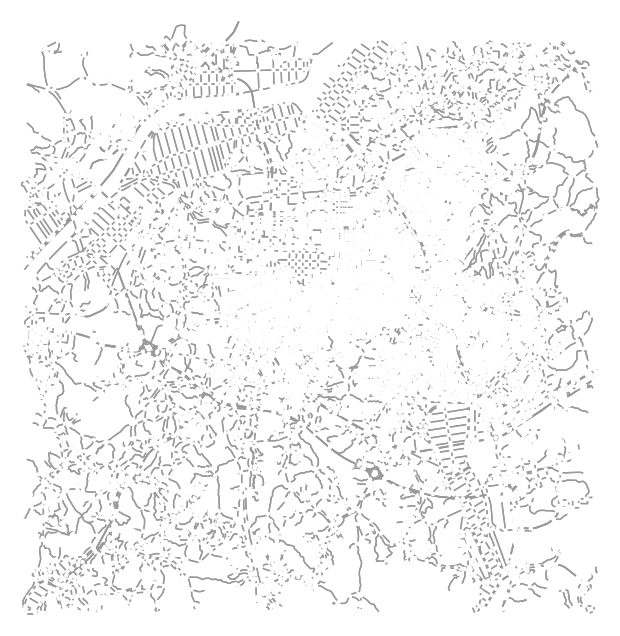

In [45]:
# Ï∂úÎ∞úÏßÄ Î∞è Î™©Ï†ÅÏßÄ Ï¢åÌëú ÏÑ§Ï†ï
origin = (36.6256453, 127.4314837)        # Ï≤≠Ï£º ÏãúÏô∏Î≤ÑÏä§ÌÑ∞ÎØ∏ÎÑê
destination = (36.6246818, 127.4638686)   # Ï∂©Î∂ÅÎåÄÌïôÍµê Î≥ëÏõê

# Ï§ëÏã¨ Ï¢åÌëú Í≥ÑÏÇ∞ (Ï§ëÍ∞Ñ ÏßÄÏ†ê)
center_lat = (origin[0] + destination[0]) / 2
center_lon = (origin[1] + destination[1]) / 2
center_point = (center_lat, center_lon)

# Î∞òÍ≤Ω 2km ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ Î∂àÎü¨Ïò§Í∏∞
radius = 8000  # Î∞òÍ≤Ω 8km
cheongju_graph = ox.graph_from_point(center_point, dist=radius, network_type="walk")

# Ï∂úÎ∞úÏßÄÏôÄ Î™©Ï†ÅÏßÄÏùò Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÎÖ∏Îìú Ï∞æÍ∏∞
origin_node = get_nearest_node(cheongju_graph, *origin)
destination_node = get_nearest_node(cheongju_graph, *destination)

print(f"Ï∂úÎ∞úÏßÄ ÎÖ∏Îìú ID (Ï≤≠Ï£º ÏãúÏô∏Î≤ÑÏä§ÌÑ∞ÎØ∏ÎÑê): {origin_node}")
print(f"Î™©Ï†ÅÏßÄ ÎÖ∏Îìú ID (Ï∂©Î∂ÅÎåÄÌïôÍµê Î≥ëÏõê): {destination_node}")

# ÏãúÍ∞ÅÌôîÎ°ú Î∞òÍ≤Ω ÌôïÏù∏
fig, ax = ox.plot_graph(cheongju_graph, bgcolor='white', node_size=10, edge_linewidth=1)

In [48]:
## ÎèÑÎ≥¥ Ï†úÏô∏Ìïú ÎÑ§Ìä∏ÏõåÌÅ¨ Graph ÏÉùÏÑ±
# Ï†úÏô∏Ìï† highway Ïú†Ìòï ÏÑ§Ï†ï
excluded_highways = ['footway']

# ÌïÑÌÑ∞ÎßÅÎêú Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
filtered_graph = create_filtered_graph(cheongju_graph, excluded_highways)

- rxsite ÎÖ∏Îìú ID Î∞òÌôò ÏΩîÎìú

In [31]:
# # ÏóëÏÖÄ ÌååÏùº Í≤ΩÎ°ú
# file_path = 'rxsite_throughput(Mbps).xlsx'

# # ÏóëÏÖÄ ÌååÏùº Î°úÎìú
# rx_data = pd.read_excel(file_path)


# # Rx Ï¢åÌëúÎ•º Í∑∏ÎûòÌîÑÏóê ÎÖ∏ÎìúÎ°ú Ï∂îÍ∞ÄÌïòÍ≥† ID Î∞òÌôò
# def add_rx_node(lat, lon):
#     # ÎÖ∏Îìú Ï∂îÍ∞Ä (ÏúÑÎèÑ, Í≤ΩÎèÑÎ•º Ïù¥Ïö©)
#     node_id = ox.distance.nearest_nodes(G, lon, lat)
#     G.add_node(node_id, x=lon, y=lat)
#     return node_id

# # Í∞Å Rx Ï¢åÌëúÎ•º ÎÖ∏ÎìúÎ°ú Ï∂îÍ∞ÄÌïòÍ≥† Node IDÎ•º DataFrameÏùò Ï≤´ Ïó¥Î°ú Ï∂îÍ∞Ä
# rx_data['Node ID'] = rx_data.apply(
#     lambda row: add_rx_node(row['RxLatitude'], row['RxLongitude']), axis=1
# )

# # Node ID Ïó¥ÏùÑ Í∞ÄÏû• ÏôºÏ™ΩÏúºÎ°ú Ïù¥Îèô
# cols = ['Node ID'] + [col for col in rx_data.columns if col != 'Node ID']
# rx_data = rx_data[cols]

# # Í≤∞Í≥º Ï†ÄÏû•
# output_path = 'rxsite_throughput_with_node_id.xlsx'
# rx_data.to_excel(output_path, index=False)
# print(f"Node IDÍ∞Ä Ï∂îÍ∞ÄÎêú ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: {output_path}")


Node IDÍ∞Ä Ï∂îÍ∞ÄÎêú ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: rxsite_throughput_with_node_id.xlsx


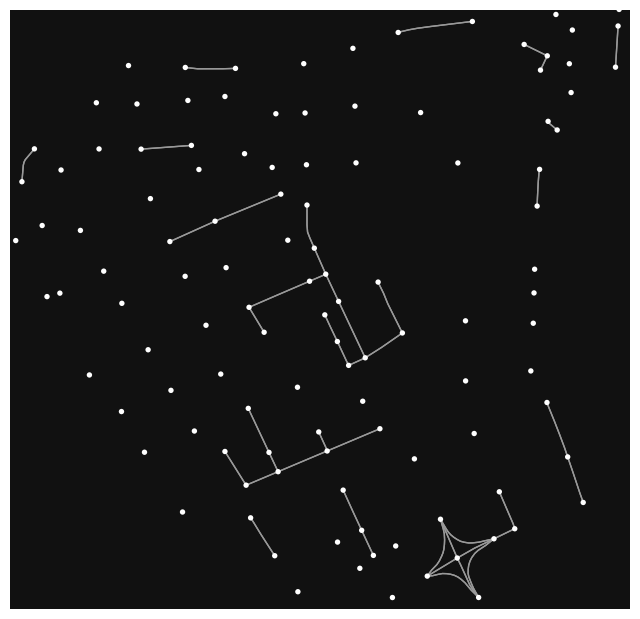

In [46]:
plot_map_with_node_ids(filtered_graph)

- ÍµêÏ∞®Î°úÏùò ÎÖ∏Îìú & Ï∂úÎ∞úÏßÄ/Î™©Ï†ÅÏßÄ ÎÖ∏ÎìúÎßå ÌëúÏãú

In [ ]:
# Rx ÎÖ∏Îìú ID Î∂àÎü¨Ïò§Í∏∞
rx_file_path = 'rxsite_throughput_with_node_id.xlsx'
rx_data = pd.read_excel(rx_file_path)
rx_node_ids = rx_data['Node ID'].tolist()

# Ï∂úÎ∞úÏßÄ, Î™©Ï†ÅÏßÄ, Rx ÎÖ∏Îìú ID Ìï©ÏπòÍ∏∞
valid_node_ids = set(rx_node_ids + [origin_node, destination_node])

# Folium ÏßÄÎèÑ ÏÉùÏÑ±
m = folium.Map(location=center_point, zoom_start=15)

# ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨Î•º FoliumÏóê Ï∂îÍ∞Ä
for u, v, data in cheongju_graph.edges(data=True):
    # Í∞Å Í∞ÑÏÑ†Ïùò Ï¢åÌëú Í∞ÄÏ†∏Ïò§Í∏∞
    points = [(cheongju_graph.nodes[u]['y'], cheongju_graph.nodes[u]['x']),
              (cheongju_graph.nodes[v]['y'], cheongju_graph.nodes[v]['x'])]
    # Í∞ÑÏÑ†ÏùÑ Folium PolyLineÏúºÎ°ú Ï∂îÍ∞Ä
    folium.PolyLine(points, color="blue", weight=2.5, opacity=0.7).add_to(m)

# Ï∂úÎ∞úÏßÄ ÎßàÏª§ Ï∂îÍ∞Ä
folium.Marker(
    location=origin,
    popup=f'Origin: {origin_node}',
    icon=folium.Icon(color='red', icon='play')
).add_to(m)

# Î™©Ï†ÅÏßÄ ÎßàÏª§ Ï∂îÍ∞Ä
folium.Marker(
    location=destination,
    popup=f'Destination: {destination_node}',
    icon=folium.Icon(color='green', icon='flag')
).add_to(m)

# Rx ÎÖ∏Îìú ÎßàÏª§ Ï∂îÍ∞Ä
for _, row in rx_data.iterrows():
    lat, lon, node_id = row['RxLatitude'], row['RxLongitude'], row['Node ID']
    folium.Marker(
        location=(lat, lon),
        popup=f'Rx Node: {node_id}',
        icon=folium.Icon(color='blue', icon='cloud')
    ).add_to(m)

# Folium ÏßÄÎèÑ Ï†ÄÏû• Î∞è ÌëúÏãú
m.save("cheongju_map.html")
m

# # ÏãúÍ∞ÅÌôî Ìï®Ïàò Í∞úÏÑ†
# def plot_filtered_graph(G, origin_node, destination_node, rx_node_ids):
#     fig, ax = plt.subplots(figsize=(12, 12))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÌôïÎåÄ
#     ox.plot_graph(G, ax=ax, show=False, close=False, node_size=30, edge_linewidth=1, bgcolor='black')

#     # Ï∂úÎ∞úÏßÄ ÎÖ∏Îìú ÌëúÏãú
#     x, y = G.nodes[origin_node]['x'], G.nodes[origin_node]['y']
#     ax.scatter(x, y, c='red', s=150, label='Origin', marker='o', edgecolors='white', linewidths=2)
#     ax.text(x + 0.0001, y + 0.0001, f'Origin\n{origin_node}', fontsize=12, color='red', ha='left', va='bottom')

#     # Î™©Ï†ÅÏßÄ ÎÖ∏Îìú ÌëúÏãú
#     x, y = G.nodes[destination_node]['x'], G.nodes[destination_node]['y']
#     ax.scatter(x, y, c='green', s=150, label='Destination', marker='o', edgecolors='white', linewidths=2)
#     ax.text(x + 0.0001, y + 0.0001, f'Destination\n{destination_node}', fontsize=12, color='green', ha='left', va='bottom')

#     # Rx ÎÖ∏Îìú ÌëúÏãú
#     for node_id in rx_node_ids:
#         if node_id in G.nodes:
#             x, y = G.nodes[node_id]['x'], G.nodes[node_id]['y']
#             ax.scatter(x, y, c='blue', s=80, label=f'Rx Node {node_id}', marker='x')
#             ax.text(x + 0.0001, y + 0.0001, str(node_id), fontsize=8, color='blue', ha='left', va='bottom')

#     # Í∏∞ÌÉÄ ÎÖ∏Îìú ÌëúÏãú (ÌöåÏÉâ)
#     for node in G.nodes:
#         if node not in rx_node_ids and node != origin_node and node != destination_node:
#             x, y = G.nodes[node]['x'], G.nodes[node]['y']
#             ax.scatter(x, y, c='gray', s=10, alpha=0.5)

#     # ÌÉÄÏù¥ÌãÄ ÏÑ§Ï†ï
#     plt.suptitle("Ï∂úÎ∞úÏßÄ, Î™©Ï†ÅÏßÄ, Rx ÎÖ∏ÎìúÎßå Ìè¨Ìï®Îêú ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨", fontsize=16, color='white')
#     plt.show()

# # ÌïÑÌÑ∞ÎßÅÎêú Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
# plot_filtered_graph(filtered_graph, origin_node, destination_node, rx_node_ids)

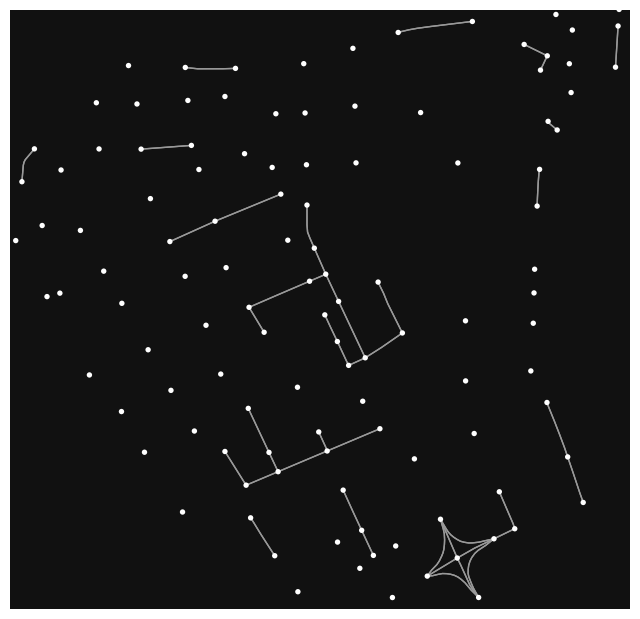

In [43]:
plot_map_with_node_ids(filtered_graph)

## Thpt ÌôúÏö©ÌïòÏó¨ ÏúÑÏùò Í≥ºÏ†ï Î∞òÎ≥µ

- thpt dataset Î∂àÎü¨Ïò§Í∏∞

In [16]:
# ÏóëÏÖÄ comm data(throughput) Î∂àÎü¨Ïò§Í∏∞
throughput_excel = pd.read_excel('rxsite_throughput_with_node_id.xlsx')

# throughput Ï†ïÎ≥¥Î•º ÎÖ∏ÎìúÏóê Îß§Ìïë
G_set_node = map_throughput_to_nodes(filtered_graph, throughput_excel)


# comm dataÍ∞Ä Îì§Ïñ¥Í∞Ñ ÏµúÏ¢ÖÏ†ÅÏù∏ ÎÑ§Ìä∏ÏõåÌÅ¨ graph ÏÉùÏÑ±
ratios = [0, 0.3, 0.6, 1]
titles = [
    "Í±∞Î¶¨ Ï§ëÏã¨ (0:1)",
    f'Throughput: Í±∞Î¶¨  ({ratios[1]}:{1-ratios[1]})',
    f'Throughput: Í±∞Î¶¨  ({ratios[2]}:{1-ratios[2]})',
    f'Throughput: Í±∞Î¶¨  ({ratios[3]}:{1-ratios[3]})'
]


# Í≤ΩÎ°ú Î∞è ÏãúÍ∞ÅÌôî
for ratio, title in zip(ratios, titles):
    # ÎπÑÏú®Ïóê Îî∞Îùº Í∞ÄÏ§ëÏπò ÏÑ§Ï†ï
    G_complete = set_edge_weights_based_on_ratio(G_set_node, ratio)

    # Í≤ΩÎ°ú ÌÉêÏÉâ
    strongest_path, avg_weight = find_strongest_path(G_complete, origin_node, destination_node)

    # Í≤ΩÎ°ú ÏãúÍ∞ÅÌôî
    print(f"\n[{title}]\n")
    plot_route(G_complete, strongest_path)

    # Í≤ΩÎ°ú Ï†ïÎ≥¥ Ï∂úÎ†•
    print(f"ÎπÑÏú® {title} Í≤ΩÎ°ú: {strongest_path}\n")
    #print(f"ÌèâÍ∑† Í∞ÄÏ§ëÏπò: {avg_weight}\n")

    # ÏµúÎã® Í≤ΩÎ°úÎ•º Í±∞ÏπòÎäî Î™®Îì† ÎÖ∏Îìú Ïàò
    num_nodes_in_path = len(strongest_path)
    print(f"Í≤ΩÎ°úÎ•º Í±∞ÏπòÎäî ÎÖ∏ÎìúÏùò Ïàò: {num_nodes_in_path} Í∞ú")
    print("\n============================================================================================================================\n")


KeyError: 'Node ID'

- Ï†ïÎ¶¨Ìëú

In [17]:
def calculate_max_min_values(G):
    """
    Í∑∏ÎûòÌîÑ GÏóêÏÑú ÏµúÎåÄ Í±∞Î¶¨, ÏµúÏÜå Í±∞Î¶¨, ÏµúÎåÄ Ï≤òÎ¶¨Ïú®, ÏµúÏÜå Ï≤òÎ¶¨Ïú®ÏùÑ Í≥ÑÏÇ∞ÌïòÏó¨ Ï∂úÎ†•.
    """
    max_distance = float('-inf')
    min_distance = float('inf')
    max_throughput = float('-inf')
    min_throughput = float('inf')

    for u, v, data in G.edges(data=True):
        # Í±∞Î¶¨ Í∞í
        distance = data.get('length', float('inf'))

        # ÎÖ∏ÎìúÏùò throughput Í∞íÏùÑ Í∞ÄÏ†∏Ïò¥ (ÏóÜÏúºÎ©¥ 0ÏúºÎ°ú ÏÑ§Ï†ï)
        throughput_u = G.nodes[u].get('throughput', 0)
        throughput_v = G.nodes[v].get('throughput', 0)

        # Îëê ÎÖ∏ÎìúÏùò throughput ÌèâÍ∑† Í≥ÑÏÇ∞
        avg_throughput = (throughput_u + throughput_v) / 2

        # ÏµúÎåÄ, ÏµúÏÜå Í±∞Î¶¨ ÏóÖÎç∞Ïù¥Ìä∏
        max_distance = max(max_distance, distance)
        min_distance = min(min_distance, distance)

        # ÏµúÎåÄ, ÏµúÏÜå Ï≤òÎ¶¨Ïú® ÏóÖÎç∞Ïù¥Ìä∏
        max_throughput = max(max_throughput, avg_throughput)
        min_throughput = min(min_throughput, avg_throughput)

    print("\nüìä ÏµúÎåÄ/ÏµúÏÜå Í∞í")
    print(f"ÏµúÎåÄ Í±∞Î¶¨: {max_distance:.3f}")
    print(f"ÏµúÏÜå Í±∞Î¶¨: {min_distance:.3f}")
    print(f"ÏµúÎåÄ Ï≤òÎ¶¨Ïú®: {max_throughput:.3f}")
    print(f"ÏµúÏÜå Ï≤òÎ¶¨Ïú®: {min_throughput:.3f}")

    return max_throughput, min_throughput, max_distance, min_distance

# ÏÇ¨Ïö© ÏòàÏãú
max_throughput, min_throughput, max_distance, min_distance = calculate_max_min_values(G_complete)


NameError: name 'G_complete' is not defined